In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 
from scipy.stats import skew, boxcox
from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv("./SOCR-HeightWeight.csv")
df.drop(['Index'], axis=1, inplace=True)

In [4]:
df.rename(columns={
    'Height(Inches)':'Height',
    'Weight(Pounds)':'Weight',
}, inplace=True)

df.columns

Index(['Height', 'Weight'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  25000 non-null  float64
 1   Weight  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [6]:
df['Height'] = df['Height']*(2.54) # To convert inches to cm we need to multiply it by 2.54
df['Weight'] = df['Weight']/2.205 # To convert pound to kg we need to divide it by 2.205

In [7]:
df

,Height,Weight
0,167.089607,51.243764
1,181.648633,61.899002
2,176.272800,69.399955
3,173.270164,64.551202
4,172.181037,65.440862
...,...,...
24995,176.535461,53.528889
24996,163.952580,54.509388
24997,164.334317,53.635147
24998,171.524117,59.985578


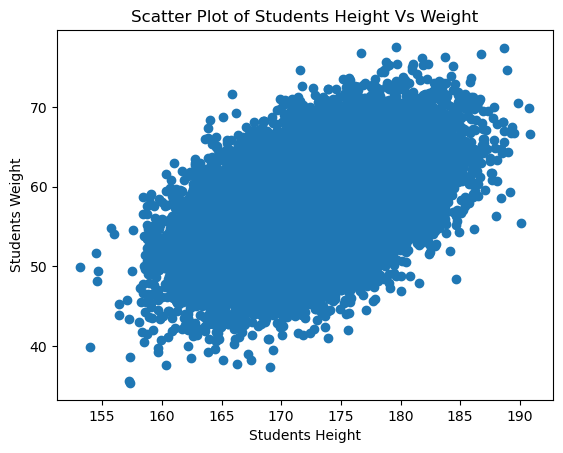

In [8]:
plt.scatter(x =df.Height, y=df.Weight)
plt.xlabel("Students Height")
plt.ylabel("Students Weight")
plt.title("Scatter Plot of Students Height Vs Weight")
plt.show()

<AxesSubplot: xlabel='Height', ylabel='Weight'>

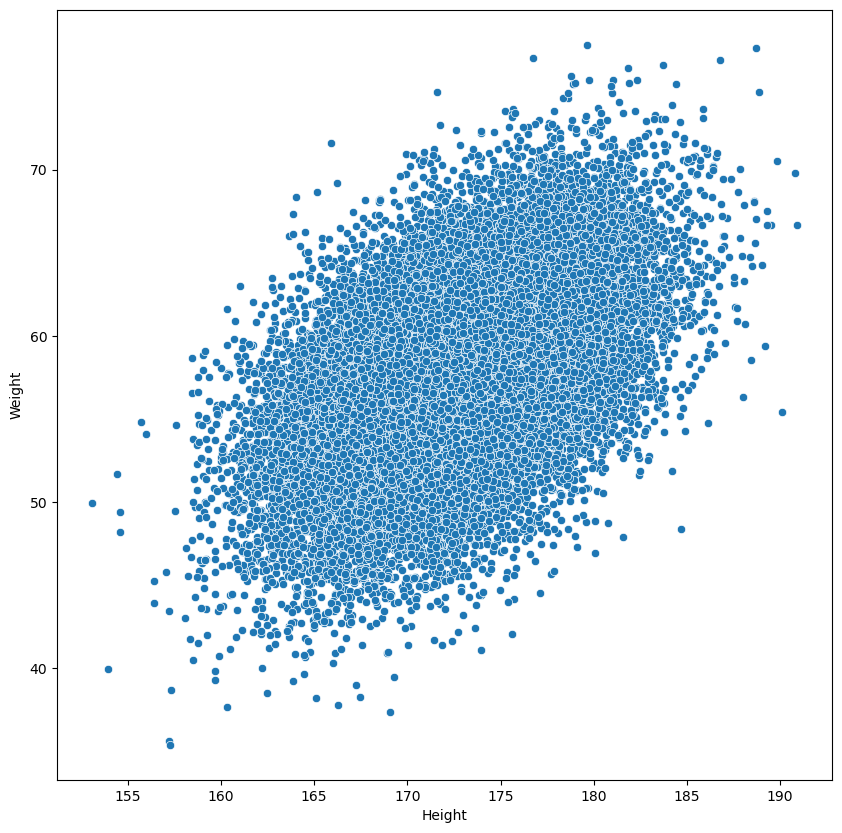

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['Height'], y=df['Weight'])

Text(0, 0.5, 'Count')

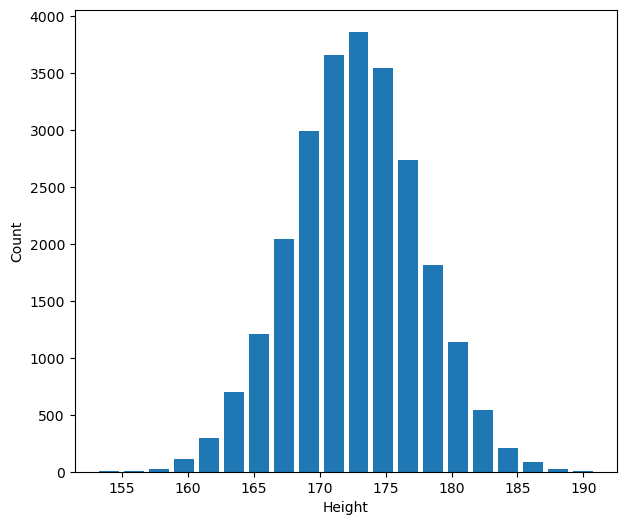

In [11]:
plt.figure(figsize=(7,6))
plt.hist(df['Height'], bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

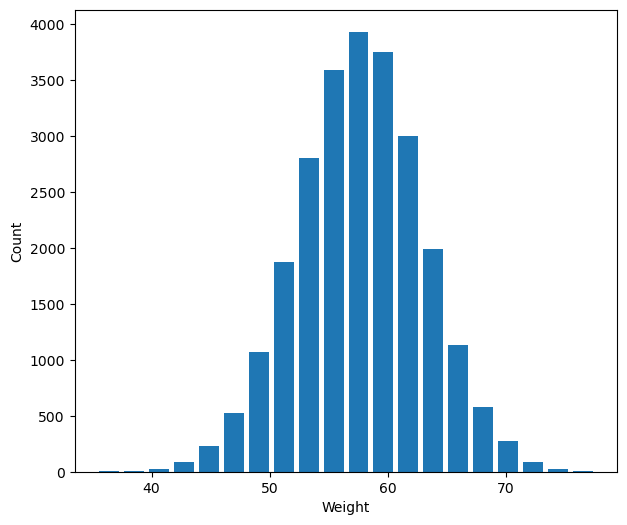

In [12]:
plt.figure(figsize=(7,6))
plt.hist(df['Weight'], bins=20, rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')

In [13]:
df.mean()

Height    172.702509
Weight     57.632391
dtype: float64

In [15]:
X = df.drop("Weight", axis = "columns")
y = df.drop("Height", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (25000, 1)
shape of y =  (25000, 1)


In [16]:
from sklearn.model_selection import train_test_split  

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)  

print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (20000, 1)
shape of y_train =  (20000, 1)
shape of X_test =  (5000, 1)
shape of y_test =  (5000, 1)


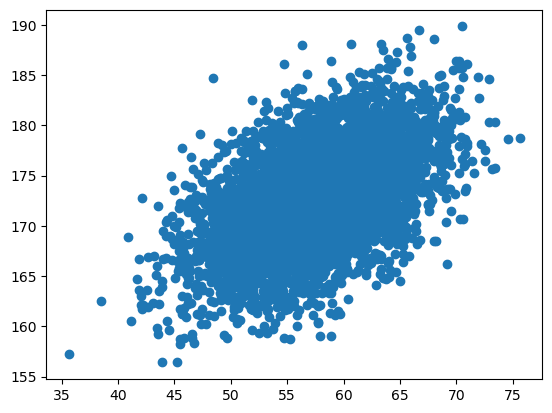

In [17]:
plt.scatter(y_test,X_test) 

In [18]:
 from sklearn.linear_model import LinearRegression 
 lr = LinearRegression() 

In [19]:
lr.fit(X_train,y_train) # Train the model 

LinearRegression()

In [20]:
# Coefficient

lr.coef_ 

array([[0.55117244]])

In [21]:
# Intercept 

lr.intercept_

array([-37.55111561])

In [35]:
h = int(input("Enter the value of height"))
pred = lr.predict([[h]])
pred

Enter the value of height 163


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[52.28999263]])

In [31]:
height = int(input("Enter the value of height to get it's estimated weight ?"))

m = lr.coef_ 
c = lr.intercept_
x = height
y = m * x + c
y

Enter the value of height to get it's estimated weight ? 163


array([[52.28999263]])

In [23]:
y_pred  = lr.predict(X_test)
y_pred

array([[52.39539928],
       [59.6445974 ],
       [58.87078755],
       ...,
       [57.90940866],
       [59.47758002],
       [57.45188184]])

In [28]:
X_test


,Height
16103,163.191241
12821,176.343564
21167,174.939630
5138,169.148709
18473,171.297117
...,...
656,180.516149
11527,176.320856
5630,173.195386
23189,176.040542


In [29]:
y_test

,Weight
16103,57.161678
12821,60.706213
21167,55.663855
5138,58.245125
18473,52.414014
...,...
656,66.125306
11527,61.236190
5630,58.703673
23189,60.379229


In [36]:
resultant = pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["height", "weight", "weight_predicted"])

In [37]:
resultant

,height,weight,weight_predicted
0,163.191241,57.161678,52.395399
1,176.343564,60.706213,59.644597
2,174.939630,55.663855,58.870788
3,169.148709,58.245125,55.678992
4,171.297117,52.414014,56.863135
...,...,...,...
4995,180.516149,66.125306,61.944411
4996,176.320856,61.236190,59.632082
4997,173.195386,58.703673,57.909409
4998,176.040542,60.379229,59.477580


In [25]:
lr.score(X_test,y_test)   

0.25661964752841937

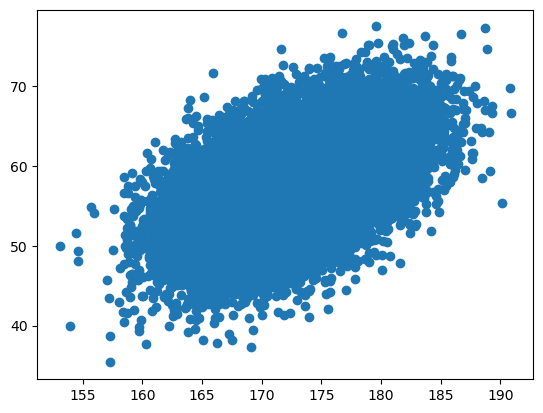

In [26]:
plt.scatter(X_train,y_train)

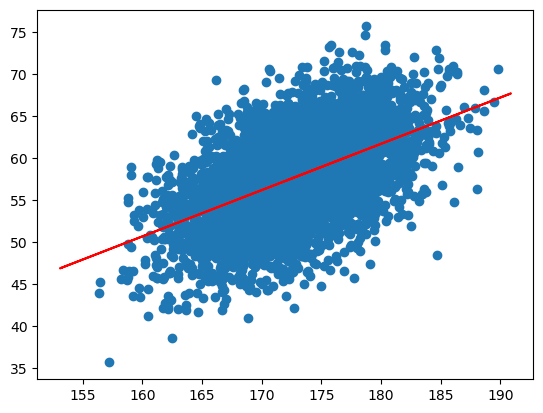

In [27]:
# Values we got from our model on basis of x_train and saved it in y_train
y_train = lr.predict(X_train) 

# First graph
plt.scatter(X_test, y_test)

# Second line graph by predicted values. 
plt.plot(X_train, y_train, color = "r")